In [1]:
# read all the json files following the pattern processed_{number}.json into a single dataframe
import pandas as pd
import json
import os

def read_json_files():
    data = []
    for filename in os.listdir('.'):
        if filename.startswith('processed_') and filename.endswith('.json'):
            with open(filename, 'r') as f:
                data.extend(json.load(f))
    return data 




In [2]:
parsed_json = read_json_files()
# convert the json into a dataframe
df = pd.DataFrame(parsed_json,columns=['output_sentences','introduction'])
df.head()

,output_sentences,introduction
0,[{'sentence': 'We evaluate our approach of spe...,We evaluate our approach of specializing docum...
1,"[{'sentence': 'In summary, our contributions a...","In summary, our contributions are:\n(1) We pro..."
2,[{'sentence': 'Most modern approaches to NLP t...,Most modern approaches to NLP tasks rely on su...
3,[{'sentence': 'We study the problem of using p...,We study the problem of using partial annotati...
4,[{'sentence': 'To address the above-mentioned ...,"To address the above-mentioned challenge, we p..."


In [3]:
df.shape

(31912, 2)

In [4]:
# check for nan values
df.isna().sum()


output_sentences    33
introduction         0
dtype: int64

In [5]:
# drop nan 
df = df.dropna()

In [ ]:

df.describe()

In [6]:
# clean emptyh  arrays from df
df_test =df['output_sentences'].apply(lambda x: x if len(x) > 0 else None)
df = df.dropna()

In [7]:
# Assuming you have the necessary data available

# Create a list to store the data
data = []

# Iterate over the parsed_json dataframe
for index, row in df.iterrows():
    # Extract the necessary information

    introduction = row['introduction']
    output_sentences = row['output_sentences']
    for j in range(len(output_sentences)):
        sentenceRow = output_sentences[j]
        if('sentence' not in sentenceRow):
            continue
        if('move' not in sentenceRow):
            continue

        if('sub_move' not in sentenceRow):
            continue

        sentence = sentenceRow['sentence']
        move = sentenceRow['move']
        sub_move = sentenceRow['sub_move']
        data.append({'introduction': introduction, 'sentence': sentence, 'move': move, 'sub_move': sub_move})


# Create a new dataframe from the data
new_df = pd.DataFrame(data)

# Display the new dataframe
new_df.head()

is_move_cell_executed = False
is_sub_move_cell_executed = False


In [8]:
new_df.shape,new_df['move'].isna().sum(),new_df['sub_move'].isna().sum()
new_df = new_df.dropna()
new_df.shape,new_df['move'].isna().sum(),new_df['sub_move'].isna().sum()

((151821, 4), 0, 0)

In [9]:
new_df.shape

(151821, 4)

In [10]:
# drop duplicates ( sentence , introduction columns)
new_df = new_df.drop_duplicates(subset=['sentence', 'introduction'])
new_df.shape

(148632, 4)

In [11]:
# unique labels on move  
unique_moves = new_df['move'].unique()
print(f"    unique moves: {unique_moves}")




    unique moves: ['3' '1' '2' 'Move 1' 1 'Move 3' 'Move 2' 2 3 'None' 'Move 2.' 'N/A' ''
 '4' '2:d' '3:d' 'NA' 'Not Applicable' 'Move' 'Occupying the Niche' '1 '
 '2 ' '1a' '1b' '2a' 'none' '1.' '2.'
 '1 (Establishing a Research Territory)' '2 (Establishing a Niche)'
 '**Move 1**' '**Move 2**']


In [12]:
def homogenize_move_labels(move):

  if isinstance(move, str):
    # Handle string representations of moves

    if move.isdigit() and int(move) >= 0 and int(move) <=2:
      return int(move) - 1  # Convert numeric strings to 0-based index

    elif move.__contains__('1'):
      return 0 

    elif move.__contains__('2'):
      return 1 

    elif move.__contains__('3'):
      return 2 
    elif move.__contains__('4'):
      return None
    else:
      return None  # Handle other invalid string formats

  elif isinstance(move, (int, float)):
    # Handle integer or float values directly
    if pd.isna(move):  # Check for NaN explicitly
      return None
    else:
      return int(move) - 1  # Convert to 0-based index

  else:
    # Handle other data types or unexpected values
    return None
if not(is_move_cell_executed):

  # Apply homogenization function to the 'move' column
  new_df['move'] = new_df['move'].apply(homogenize_move_labels)

  # Drop rows with NaN values in the 'move' column
  new_df.dropna(subset=['move'], inplace=True)
  new_df['move'] = new_df['move'].apply(int)

  # Print unique values in the 'move' column (optional)
  print(new_df['move'].unique())
  is_move_cell_executed = True

[2 0 1]


In [13]:
unique_sub_moves = new_df['sub_move'].unique()
print(f"    unique sub moves: {unique_sub_moves}")

    unique sub moves: ['a' 'b' 'c' 'd' 'e' 'D' 'A' 'E' 'None' 'a)' 'b)' 'none' ''
 'b) Introduce and review previous research in the field' 'null' 'e ' 'a.'
 'b.'
 'a (Show that the research area is important, problematic, or relevant in some way)'
 'b (Introduce and review previous research in the field)'
 'a (Claim something is wrong with the previous research)' '**a)**'
 '**b)**']


In [14]:
def homogenize_sub_move_labels(sub_move):
   if sub_move.lower().__contains__('a'):
    return 0

   elif sub_move.lower().__contains__('b'):
    return 1

   elif sub_move.lower().__contains__('c'):
    return 2

   elif sub_move.lower().__contains__('d'):
    return 3

   elif sub_move.lower().__contains__('e'):
    return 4

   elif sub_move == 'NA' or sub_move == 'none' or sub_move == 'N/A' or sub_move == '' or sub_move == 'null' or sub_move == 'nan' or sub_move == 'None':
    return None

   else:
    return sub_move

# Assuming you have your DataFrame `new_df`
if not(is_sub_move_cell_executed):
  # Apply homogenization function to the 'sub_move' column
  new_df['sub_move'] = new_df['sub_move'].apply(homogenize_sub_move_labels)

  # Filter for non-NaN values (alternative to dropna)

  new_df.dropna(subset=['sub_move'], inplace=True)
  new_df['sub_move'] = new_df['sub_move'].apply(int)
  # Calculate unique sub moves (optional)
  unique_labels_sub_move = new_df['sub_move'].unique()
  print(f"Unique sub moves: {unique_labels_sub_move}")
  is_sub_move_cell_executed = True

Unique sub moves: [0 1 2 3 4]


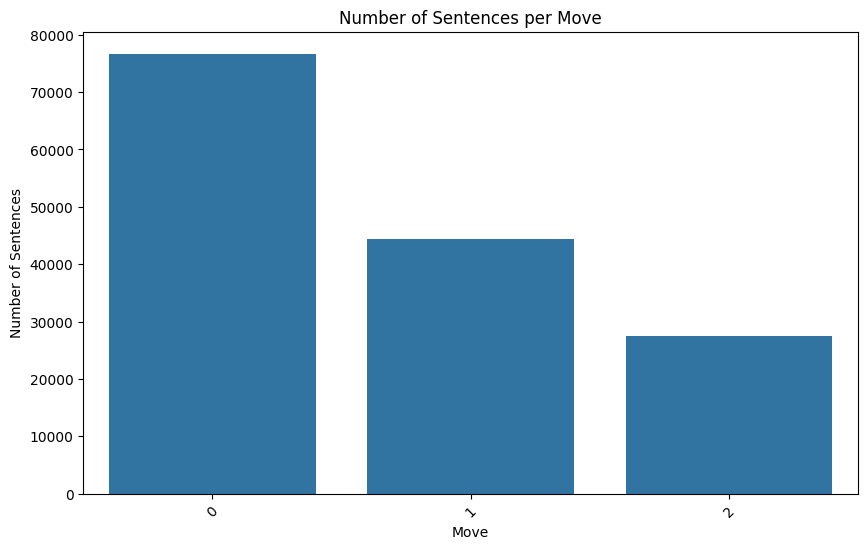

In [15]:

# graph analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of sentences per move
move_counts = new_df['move'].value_counts()

# Plot the number of sentences per move
plt.figure(figsize=(10, 6))
sns.barplot(x=move_counts.index, y=move_counts.values)
plt.title('Number of Sentences per Move')
plt.xlabel('Move')
plt.ylabel('Number of Sentences')
plt.xticks(rotation=45)
plt.show()

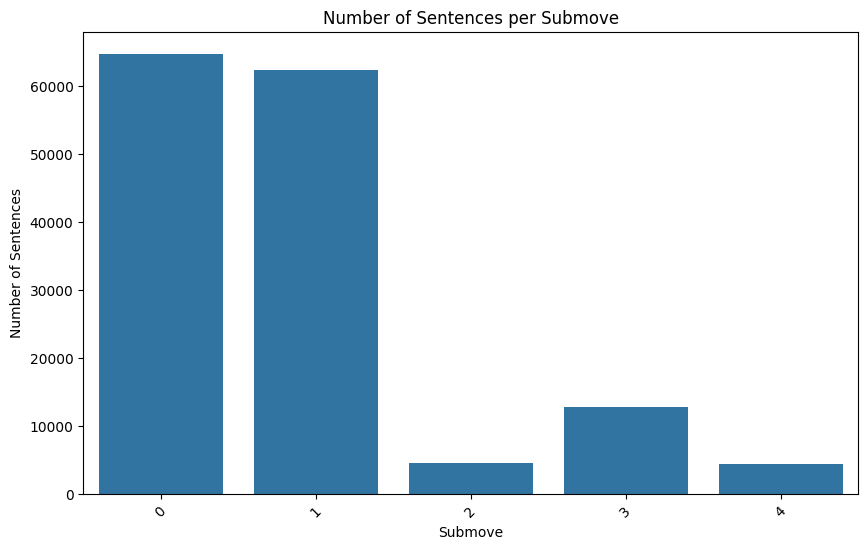

In [16]:
# submoves graph
# Count the number of sentences per submove
sub_move_counts = new_df['sub_move'].value_counts()

# Plot the number of sentences per submove
plt.figure(figsize=(10, 6))
sns.barplot(x=sub_move_counts.index, y=sub_move_counts.values)
plt.title('Number of Sentences per Submove')
plt.xlabel('Submove')
plt.ylabel('Number of Sentences')
plt.xticks(rotation=45)
plt.show()

In [17]:
# create a new column named move_sub_move , which is a combination of move and sub_move 
new_df['move_sub_move'] = new_df['move'].astype(str) + '.' + new_df['sub_move'].astype(str)
print(new_df.isna().sum())


introduction     0
sentence         0
move             0
sub_move         0
move_sub_move    0
dtype: int64


In [18]:
# unique labels
unique_labels = new_df['move_sub_move'].unique()
print(f"    unique labels: {unique_labels}")


    

    unique labels: ['2.0' '0.1' '1.0' '1.1' '0.0' '1.2' '1.3' '2.3' '2.4' '2.1' '2.2' '0.3'
 '1.4' '0.4' '0.2']


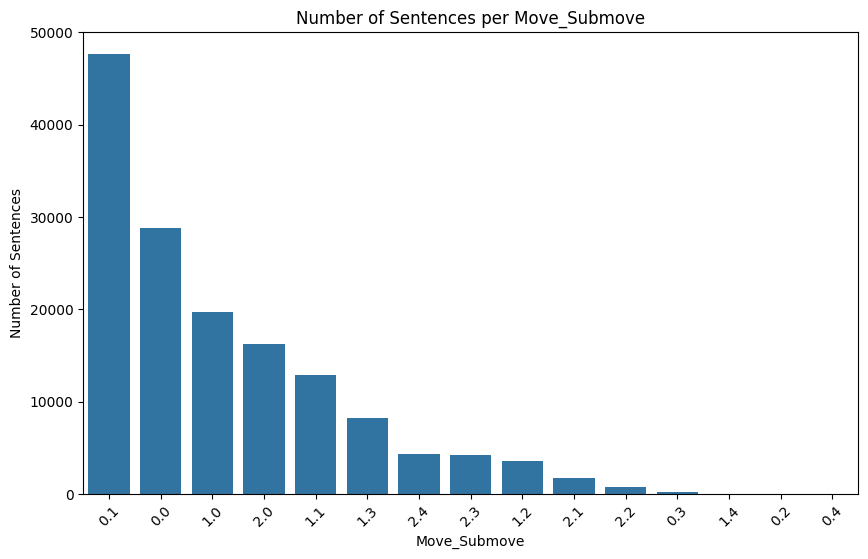

In [19]:
# graph of the number of sentences per move_sub_move
# Count the number of sentences per move_sub_move
move_sub_move_counts = new_df['move_sub_move'].value_counts()

# Plot the number of sentences per move_sub_move
plt.figure(figsize=(10, 6))
sns.barplot(x=move_sub_move_counts.index, y=move_sub_move_counts.values)
plt.title('Number of Sentences per Move_Submove')
plt.xlabel('Move_Submove')
plt.ylabel('Number of Sentences')
plt.xticks(rotation=45)
plt.show()

In [20]:
# clean rows with wrong (move,sub_move) combinations 1.3, 1.4, 1.5, 2.5 
wrong_combination = ['0.2', '0.3', '0.4', '1.4']

cleaned_df = new_df[~new_df['move_sub_move'].isin(wrong_combination)]
print(f' cleaned rows shape: {new_df.shape[0] - cleaned_df.shape[0]}')
print(f" new shape: {cleaned_df.shape}")
new_df = cleaned_df
print(new_df.isna().sum())

 cleaned rows shape: 357
 new shape: (148220, 5)
introduction     0
sentence         0
move             0
sub_move         0
move_sub_move    0
dtype: int64


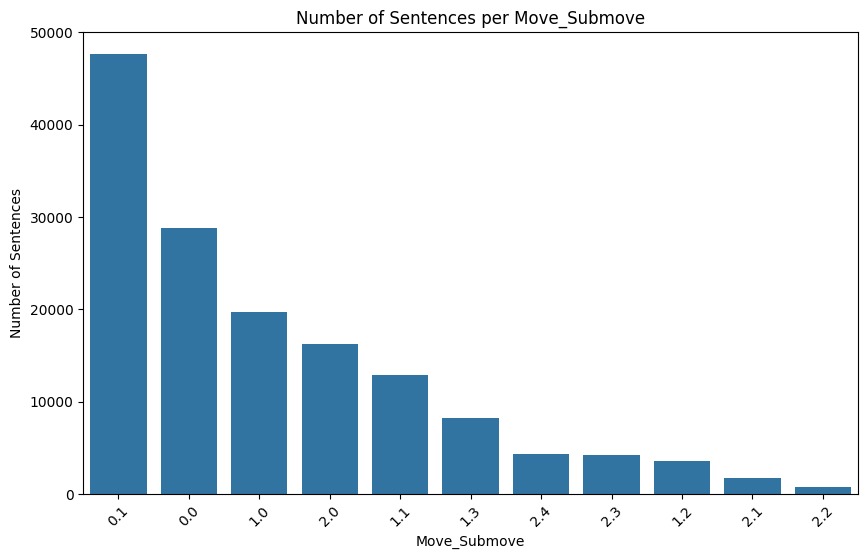

In [21]:

# graph of the number of sentences per move_sub_move
# Count the number of sentences per move_sub_move
move_sub_move_counts = new_df['move_sub_move'].value_counts()

# Plot the number of sentences per move_sub_move
plt.figure(figsize=(10, 6))
sns.barplot(x=move_sub_move_counts.index, y=move_sub_move_counts.values)
plt.title('Number of Sentences per Move_Submove')
plt.xlabel('Move_Submove')
plt.ylabel('Number of Sentences')
plt.xticks(rotation=45)
plt.show()

# TF-ids Classifiers

In [23]:
# vectorize the sentence column using tf_ids
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the vectorizer on the sentence column
tfidf_matrix = vectorizer.fit_transform(new_df['sentence'])
###   TF-IDF(t, d) = TF(t, d) * IDF(t)

#  TF(t, d) is the term frequency of term t in document d
#  IDF(t) is the inverse document frequency of term t

#  TF(t, d) = 1 + log(f(t, d)) : frequency of term t in document d with logarithmic scaling ( reduce the enphasis of the most frequent words)


# IDF(t) = log(N / df(t))
   # df(t) is the document frequency of term t, which is the number of documents that contain the term at least once.
   # N is the total number of documents in the corpus.








In [24]:
new_df.shape,tfidf_matrix.get_shape()


((148220, 5), (148220, 48488))

In [26]:
new_df['move_sub_move'].unique()

array(['2.0', '0.1', '1.0', '1.1', '0.0', '1.2', '1.3', '2.3', '2.4',
       '2.1', '2.2'], dtype=object)

In [31]:
# create a random forest classifier to classify moves
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from   sklearn.preprocessing import LabelEncoder

# Create the features matrix (X) and target vector (y)
X = tfidf_matrix
y = new_df['move']

encoder = LabelEncoder() 
y = encoder.fit_transform(y) 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




    

In [274]:

# Create a RandomForestClassifier object
rf = RandomForestClassifier()
    

# Train the model
rf.fit(X_train, y_train)

# Predict the target vector
y_pred = rf.predict(X_test)

# Calculate the accuracy 
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Random forest Accuracy: {rf_accuracy}")


Random forest Accuracy: 0.6073641997812614


In [78]:
# create an svm classifier
from sklearn.svm import SVC

# Create a SVC object
svc = SVC()

# Train the model
svc.fit(X_train, y_train)

# Predict the target vector
y_pred = svc.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

KeyboardInterrupt: 

In [82]:
# create a naive bayes classifier
from sklearn.naive_bayes import MultinomialNB

# Create a MultinomialNB object
nb = MultinomialNB()

# Train the model
nb.fit(X_train, y_train)
    
# Predict the target vector
y_pred = nb.predict(X_test)
    
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5556588426679061


In [37]:
# create a logistic regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report   
from sklearn.utils.class_weight import compute_class_weight

import numpy as np
total_samples = len(y_train)
class_weights = {}
for i in range(3):
  class_weights[i] = total_samples / (2 * np.sum(y_train == i))

print(class_weights)
# Create a LogisticRegression object
lr = LogisticRegression(n_jobs=8,class_weight='balanced')

# Train the model
lr.fit(X_train, y_train)

# Predict the target vector
y_pred = lr.predict(X_test)

print(classification_report(y_test,y_pred))


{0: 0.9721894267348813, 1: 1.6663293985385048, 2: 2.6934399418499}
              precision    recall  f1-score   support

           0       0.73      0.63      0.68     15437
           1       0.50      0.49      0.50      8822
           2       0.47      0.66      0.55      5385

    accuracy                           0.60     29644
   macro avg       0.57      0.60      0.57     29644
weighted avg       0.61      0.60      0.60     29644



/home/sidali/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
# create a decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier object
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train, y_train)

# Predict the target vector
y_pred = dt.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
    

Accuracy: 0.5159191261910295


In [81]:
# create a k-nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier object
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Predict the target vector
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5400883104810598


In [83]:
# create a gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

# Create a GradientBoostingClassifier object
gb = GradientBoostingClassifier()

# Train the model
gb.fit(X_train, y_train)

# Predict the target vector
y_pred = gb.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
    

KeyboardInterrupt: 

In [52]:
# create a neural network classifier using keras (functional)
from keras import Input,Model,layers,utils
def build_neural_network_classifier():
    # Create the input layer
    input_layer = Input(shape=(tfidf_matrix.shape[1],))

    # Create the hidden layer
    hidden_layer = layers.Dense(6, activation='relu')(input_layer)
    hidden_layer = layers.Dense(6, activation='relu')(hidden_layer)


    # Create the output layer
    output_layer = layers.Dense(len(new_df['move'].unique()), activation='softmax')(hidden_layer)

    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)
    return model
    
neural_network = build_neural_network_classifier()

NameError: name 'tfidf_matrix' is not defined

In [86]:
neural_network.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 18553)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        18,554 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,560 (72.50 KB)

 Trainable params: 18,560 (72.50 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
from keras import metrics
from official.nlp import optimization  # to create AdamW optimizer

epochs = 15
steps_per_epoch = new_df.shape[0] 
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')
# import metric
# Compile the model

neural_network.compile(optimizer='adamw', loss='sparse_categorical_crossentropy', metrics=[metrics.SparseCategoricalAccuracy()])

    
# Train the model
neural_network.fit(X_train.toarray(), y_train, epochs=10, batch_size=32)

# Predict the target vector
y_pred = neural_network.predict(X_test.toarray())

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred.argmax(axis=1))
print(f"Accuracy: {accuracy}")

2024-05-22 06:19:14.811467: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1277336944 exceeds 10% of free system memory.


Epoch 1/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.0372 - sparse_categorical_accuracy: 0.5197
Epoch 2/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9547 - sparse_categorical_accuracy: 0.5187
Epoch 3/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.8993 - sparse_categorical_accuracy: 0.5312
Epoch 4/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.8658 - sparse_categorical_accuracy: 0.5812
Epoch 5/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.8233 - sparse_categorical_accuracy: 0.6064
Epoch 6/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7926 - sparse_categorical_accuracy: 0.6249
Epoch 7/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7577 - sparse_categorical_accuracy: 0.6452
Epoch 8/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7324 - sparse_categorical_accuracy: 0.6657
Epoch 9/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7090 - sparse_categorical_accuracy: 0.6830
Epoch 10/10
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - 

2024-05-22 06:19:40.700079: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 319334236 exceeds 10% of free system memory.


135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.5749477108993726


# Bert classification , without fine tunning the model

In [95]:
# save new df as a csv file
new_df.to_csv('aggregated_data.csv', index=True)
